<a href="https://colab.research.google.com/github/hasdasda/HoctheoPhamDinhKhanh/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02.Neural Network classificatuon with PyTorch
Classification is a problem of predicting whether something is one thing or another (there can be m)

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Nake 1000 samples
n_samples = 100

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(100, 100)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[-0.40957228 -0.70266396]
 [ 0.75810247  0.33360948]
 [-0.64086599  0.48813954]
 [ 0.78212694 -0.59114489]
 [ 0.77303687 -0.71826406]]
First 5 samples of y: 
[1 1 1 0 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,-0.409572,-0.702664,1
1,0.758102,0.333609,1
2,-0.640866,0.488140,1
3,0.782127,-0.591145,0
4,0.773037,-0.718264,0
5,0.215881,-0.930492,0
6,-0.916040,0.317596,0
7,-0.637408,-0.472662,1
8,0.323051,0.973140,0
9,0.976609,-0.025317,0


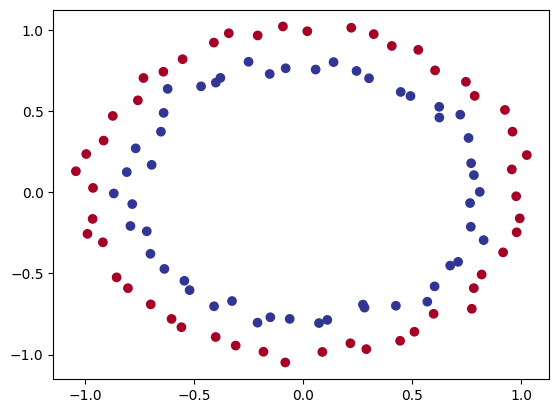

In [6]:
# Visualize, visualize, visualiza
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred as to a toy dataset, a dataset that is small enough to experiment but still sizeabke enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((100, 2), (100,))

In [8]:
X

array([[-0.40957228, -0.70266396],
       [ 0.75810247,  0.33360948],
       [-0.64086599,  0.48813954],
       [ 0.78212694, -0.59114489],
       [ 0.77303687, -0.71826406],
       [ 0.21588148, -0.93049176],
       [-0.91603993,  0.31759593],
       [-0.63740824, -0.47266177],
       [ 0.32305084,  0.97314019],
       [ 0.97660894, -0.02531689],
       [-0.64194001,  0.74154651],
       [-0.80450232, -0.59118789],
       [-0.69586068,  0.16819918],
       [-0.55928823, -0.83160963],
       [ 0.27339475, -0.69222843],
       [ 0.9249943 ,  0.50646567],
       [-0.78489998, -0.07336768],
       [-0.79317619, -0.20843689],
       [ 0.01831779,  0.9911613 ],
       [-0.70008939, -0.69083788],
       [ 0.62399231,  0.45943486],
       [ 0.07195491, -0.80609432],
       [-0.96661707, -0.16467296],
       [ 0.50971765, -0.85952722],
       [-0.62247342,  0.63594759],
       [-0.34190497,  0.97850305],
       [ 0.28903518, -0.96647014],
       [ 0.71008503, -0.42915845],
       [ 0.40589714,

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Sample input features: {X_sample}\nSample target label: {y_sample}")

Sample input features: [-0.40957228 -0.70266396]
Sample target label: 1


### 1.2 Turn data into tensors and create traun and test splits

In [10]:
import torch
torch.__version__

'2.5.1+cu121'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.4096, -0.7027],
         [ 0.7581,  0.3336],
         [-0.6409,  0.4881],
         [ 0.7821, -0.5911],
         [ 0.7730, -0.7183]]),
 tensor([1., 1., 1., 0., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

## 2. Bulding a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnoistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Creat a training and test loop.

In [16]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [17]:
X_train

tensor([[-0.7182, -0.2408],
        [-0.9960,  0.2350],
        [ 0.2890, -0.9665],
        [ 0.6045,  0.7500],
        [ 0.8273, -0.2954],
        [ 0.9250,  0.5065],
        [ 0.9930, -0.1612],
        [-0.6533,  0.3724],
        [ 0.9766, -0.0253],
        [ 0.4468,  0.6171],
        [-0.8045, -0.5912],
        [-0.9649,  0.0262],
        [ 0.7699,  0.1783],
        [ 0.4059,  0.9004],
        [-0.5217, -0.6033],
        [ 0.2159, -0.9305],
        [ 0.8182, -0.5072],
        [-0.4013,  0.6746],
        [ 0.7861,  0.5928],
        [-0.7849, -0.0734],
        [-0.0936,  1.0203],
        [ 0.5689, -0.6746],
        [-0.6374, -0.4727],
        [ 0.2440,  0.7463],
        [ 0.7101, -0.4292],
        [-0.7001, -0.6908],
        [-0.3271, -0.6705],
        [-0.3419,  0.9785],
        [ 0.7201,  0.4772],
        [-0.5593, -0.8316],
        [-0.6225,  0.6359],
        [ 0.7821, -0.5911],
        [-0.7932, -0.2084],
        [-0.3104, -0.9445],
        [ 0.3231,  0.9731],
        [ 0.6022, -0

Now we've setup device agnoistic code, let's build a model.
1. Subclasses 'nn.Module' (almost all models in PyTorch subclass 'nn.Module')
2. Create 2 'nn.Linear()' layers that are capable of handling of handling the shapes of our data.
3. Defines a 'forward()' method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device



In [23]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5,
                             out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cpu'

In [20]:
next(model_0.parameters()).device

device(type='cpu')

In [25]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
  nn.Linear(in_features=2, out_features=5),
  nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5241, -0.6952],
                      [-0.3897,  0.5965],
                      [ 0.5718, -0.0702],
                      [-0.6132, -0.0593],
                      [ 0.5901, -0.1817]])),
             ('0.bias', tensor([-0.0235, -0.4372, -0.4716, -0.0640,  0.5109])),
             ('1.weight',
              tensor([[ 0.1112,  0.2406, -0.1863, -0.4118, -0.4135]])),
             ('1.bias', tensor([-0.3154]))])

In [ ]:
# Make predictions
